In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('../') if '../' not in sys.path else None 
from methods import *
from plotting_functions import *

In [3]:
nx,ny = 1,1 # board size
res = 64

# initialize board
xx, yy = np.meshgrid(
    np.linspace(-nx/2, nx/2, res),
    np.linspace(-ny/2, ny/2, res),
)
board = np.stack([xx, yy], axis=-1)

# initialize grid module
f = 2
orientation_offset = 0
center = np.zeros(2)
add = False

squaregridmodule = SquareGridModule(center,orientation_offset,f,non_negative=False,add=add)

In [4]:
#phases = center[None]
phases = squaregridmodule.inner_square.sample(3)
#phases = np.stack([center] + [np.array([2*0.5/f, 0])] + [np.array([0, 2*0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.5/f, 0])] + [np.array([0, 0.5/f])],axis=0)
#phases = np.stack([center] + [center] + [np.array([0.5/f, 0.5/f])],axis=0)
#phases = np.stack([center] + [np.array([0.25/f, 0.25/f])] + [center],axis=0)
#phases = np.stack([center] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)
#phases = np.stack([np.array([0,-0.25/(f*np.sqrt(2))])] + [np.array([0.25/f, 0.25/f])] + [np.array([-0.25/f, 0.25/f])],axis=0)
#phases = np.stack([center] + [np.array([0.2/f, 0])] + [np.array([0.4/f, 0])],axis=0)
phases = np.stack([center] + [center] + [np.array([0.25/f, 0.25/f])],axis=0)


# check periodicity (see ratemaps below) of the inner square. x=0.5=1.5 for f=1
#phases = np.stack([center] + [np.array([-0.25/f, 0])] + [np.array([0.75/f, 0])],axis=0)

squaregridmodule.init_module(phases)
ratemaps = squaregridmodule(board)
ratemaps = ratemaps if add else np.sum(ratemaps,axis=-1)
ratemaps.shape

(3, 64, 64)

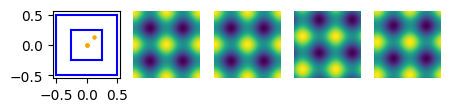

In [5]:
fig, axs = plot_samples_and_tiling(squaregridmodule, ratemaps, 3, figsize=(5,5))
axs[0].axis('on')
fig.savefig("results/three-square-patterns.png",bbox_inches='tight')

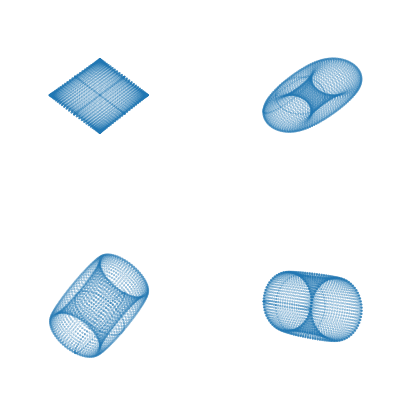

In [19]:
fig, axs = scatter3d(ratemaps.T,ncols=2,nrows=2,s=0.1,alpha=0.5, figsize=(5,5),
                     azim_elev_title=False)

In [8]:
from ripser import ripser
from persim import plot_diagrams

(array([41., 51., 35., 24., 16., 19.,  8.,  6.,  6.,  2.]),
 array([1.22845173e-04, 1.54874578e-02, 3.08520705e-02, 4.62166831e-02,
        6.15812957e-02, 7.69459084e-02, 9.23105210e-02, 1.07675134e-01,
        1.23039746e-01, 1.38404359e-01, 1.53768972e-01]),
 <BarContainer object of 10 artists>)

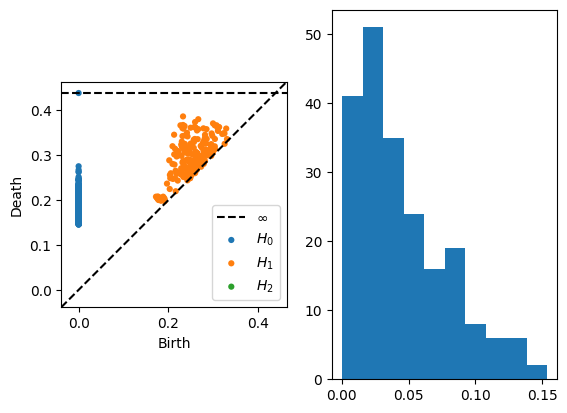

In [9]:
fig,axs = plt.subplots(ncols=2)
#dgms = ripser(g,maxdim=2,n_perm=150)['dgms']
dgms = ripser(ratemaps.reshape(ratemaps.shape[0],-1).T,maxdim=2,n_perm=400)['dgms']
plot_diagrams(dgms, show=False, ax=axs[0])
axs[1].hist(dgms[1][:,1] - dgms[1][:,0])